In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Ecommerce_Customer.csv')

In [3]:
df

Email  \
0        mstephenson@fernandez.com   
1                hduke@hotmail.com   
2                 pallen@yahoo.com   
3          riverarebecca@gmail.com   
4    mstephens@davidson-herman.com   
..                             ...   
495   lewisjessica@craig-evans.com   
496            katrina56@gmail.com   
497             dale88@hotmail.com   
498            cwilson@hotmail.com   
499      hannahwilson@davidson.com   

                                               Address            Avatar  \
0         835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1       4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2    24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3     1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4    14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   
..                                                 ...               ...   
495  4483 Jones Motorway Suite 872\nLake Jamiefurt,...               Tan   
496  172 Owen Divide Suite 497\nWest Richard, CA 19320     PaleVioletRed   
497  0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...          Cornsilk   
498  680 Jennifer Lodge Apt. 808\nBrendachester, TX...              Teal   
499  49791 Rachel Heights Apt. 898\nEast Drewboroug...       DarkMagenta   

     Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0              34.497268    12.655651        39.577668              4.082621   
1              31.926272    11.109461        37.268959              2.664034   
2              33.000915    11.330278        37.110597              4.104543   
3              34.305557    13.717514        36.721283              3.120179   
4              33.330673    12.795189        37.536653              4.446308   
..                   ...          ...              ...                   ...   
495            33.237660    13.566160        36.417985              3.746573   
496            34.702529    11.695736        37.190268              3.576526   
497            32.646777    11.499409        38.332576              4.958264   
498            33.322501    12.391423        36.840086              2.336485   
499            33.715981    12.418808        35.771016              2.735160   

     Yearly Amount Spent  
0             587.951054  
1             392.204933  
2             487.547505  
3             581.852344  
4             599.406092  
..                   ...  
495           573.847438  
496           529.049004  
497           551.620145  
498           456.469510  
499           497.778642  

[500 rows x 8 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [19]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [22]:
new_columns = list(map(lambda x: '_'.join(x.split(' ')),df.columns))
new_columns

['Email',
 'Address',
 'Avatar',
 'Avg._Session_Length',
 'Time_on_App',
 'Time_on_Website',
 'Length_of_Membership',
 'Yearly_Amount_Spent']

In [26]:
df.columns = new_columns

In [27]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg._Session_Length', 'Time_on_App',
       'Time_on_Website', 'Length_of_Membership', 'Yearly_Amount_Spent'],
      dtype='object')

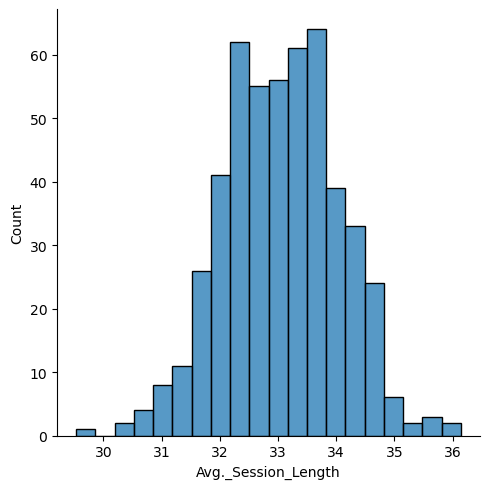

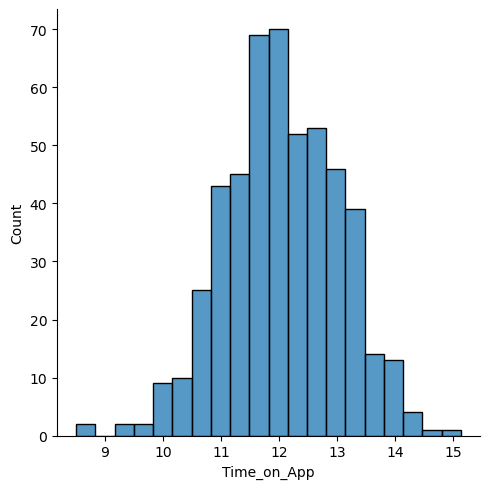

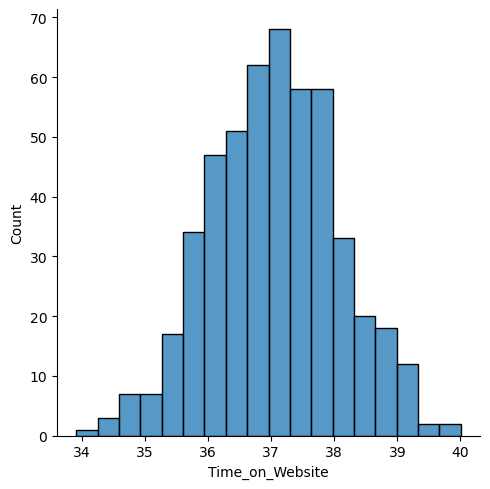

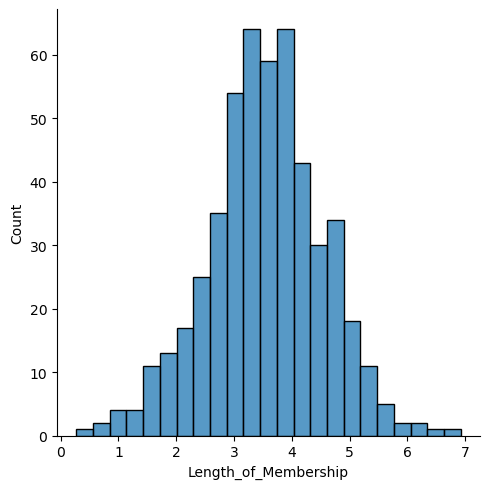

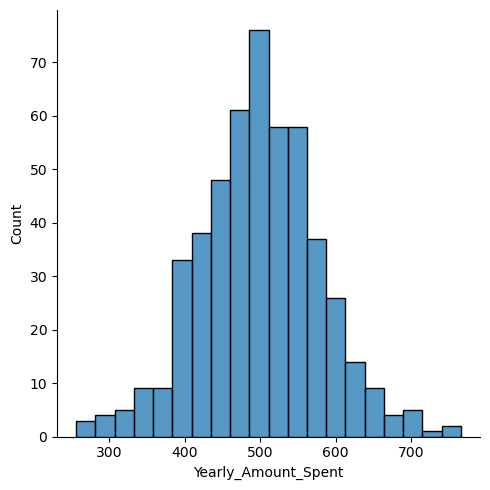

In [34]:
for col in df.columns[3:]:
    sns.displot(df[col])
plt.show()

In [40]:
x =  df.iloc[:,3:7]
y = df.iloc[:,7]

In [41]:
x

Avg._Session_Length  Time_on_App  Time_on_Website  Length_of_Membership
0              34.497268    12.655651        39.577668              4.082621
1              31.926272    11.109461        37.268959              2.664034
2              33.000915    11.330278        37.110597              4.104543
3              34.305557    13.717514        36.721283              3.120179
4              33.330673    12.795189        37.536653              4.446308
..                   ...          ...              ...                   ...
495            33.237660    13.566160        36.417985              3.746573
496            34.702529    11.695736        37.190268              3.576526
497            32.646777    11.499409        38.332576              4.958264
498            33.322501    12.391423        36.840086              2.336485
499            33.715981    12.418808        35.771016              2.735160

[500 rows x 4 columns]

In [42]:
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly_Amount_Spent, Length: 500, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25)

In [47]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [48]:
y_pred = lm.predict(x_test)

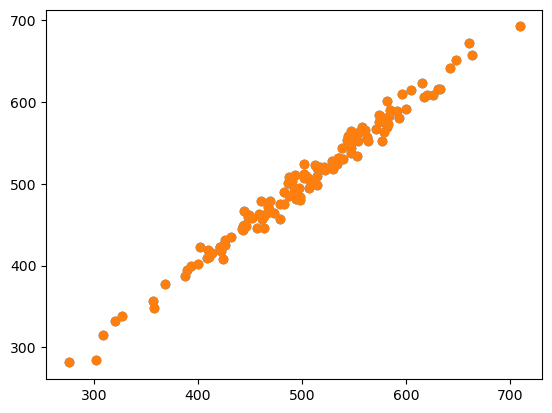

In [50]:
plt.scatter(y_test, y_pred)
plt.show()

In [51]:
lm.score(y_test, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[444.2859075  521.24078024 467.50190043 616.85152297 497.5866713
 490.73863214 554.90078302 514.08895775 465.88931271 319.9288698
 356.61556789 302.18954781 543.34016626 507.39006179 630.42276323
 472.99224667 456.46951007 487.37930602 521.88357317 408.62018783
 619.89563986 632.12358814 505.23006828 402.16712222 368.65478495
 570.63009809 512.55253436 647.61945573 531.96155055 592.6884532
 576.02524413 421.96679419 549.90414611 528.22380937 492.10505239
 514.00981785 421.32663126 501.87443028 388.94054879 448.93329321
 660.42518429 582.49192373 533.04006018 413.29599918 595.8228367
 409.09452619 424.2028271  581.30893288 482.60246733 501.92826487
 503.38788729 604.84131882 590.56271965 460.06127739 468.44573723
 506.37586675 557.60826205 552.94034545 446.41867337 399.9838716
 452.12262509 496.93344626 275.91842065 560.44379217 493.18021625
 584.21831349 447.68790654 538.94197453 578.24160506 478.95140476
 486.94705384 708.93518487 573.30622226 535.32161009 626.01867266
 489.9080531  444.05382657 327.37795259 614.71533383 583.07963566
 561.87465767 547.12593175 463.59141803 420.91615953 501.74923331
 599.40609205 426.15454771 392.99225591 529.53766534 573.84743772
 497.38955776 442.36311738 529.23009012 425.74509203 642.10157873
 553.60153468 410.06961106 663.07481761 387.35707274 485.92313052
 458.78113168 431.61773376 547.24434342 442.66725174 581.85234404
 463.4849954  443.44186006 574.65484337 461.11224843 514.23952072
 546.55666686 537.8252823  308.52774656 547.11098236 493.71919298
 478.71935687 357.85798361 534.77148495 482.83098586 576.31117737
 492.94505307 563.44603567 544.40927216 469.3108615  516.83155668].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.